# Prediction of Cardiovascular Disease (CVD) from Historical Data using the Franmingham Dataset.

Installing the necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# from sklearn import feature_selection
# from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import warnings
from warnings import filterwarnings
filterwarnings('ignore')
warnings.simplefilter('ignore')
from scipy import stats
from numpy import mean

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


## 1. Loading the data

In [2]:
# importing the dataset
data = pd.read_csv("chd_pred.csv")
# making sure the data was imported correctly
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2. Exploratory Data Analysis (EDA)


### 2.1. Variable Description

Variables in the data set are described below. The variable 'male' was renamed to 'gender' to make it more descriptive. Variables are all numerical so no label encoding was needed.

**Age:** Age in years (32 to 70) <br>
**Male:** Gender instance (1 = Female, 0= Male) <br>
**Education:** Level of education (1=0-11 years,2=High School Diploma, GED, 3=Some College, Vocational School, 4=College (BS, BA) degree or more) <br>
**CurrentSmoker:** Whether or not the patient is a current smoker 0 : no 1 : yes <br>
**CurrentSmoker:** Whether or not the patient is a current smoker 0 : no 1 : yes <br>
**CigsPerDay:** The number of cigarettes that the person smoked on average in one day <br>
**BPMeds:** Whether or not the patient was on blood pressure medication 0 : no 1 : yes <br>
**PrevalentStroke:** Whether or not the patient was on blood pressure medication 0 : no 1 : yes <br>
**PrevalentHyp:** Whether or not the patient was hypertensive 0 : no 1 : yes <br>
**Diabetes:** Whether or not the patient had diabetes 0 : no 1 : yes <br>
**TotChol:** Total cholesterol level <br>
**SysBP** Systolic blood pressure <br>
**DiaBP:** Diastolic blood pressure <br>
**BMI:** Body Mass Index <br>
**Heart Rate:** Measure of heart rate <br>
**Glucose:** Glucose level <br>
**TenyearHeart:** whether or not the patient will develop heart disease in the future ten
years (target) 0 : no 1 : yes <br>
<br>

Binary categorical variables are: 'gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' <br><br> 
Multi-level categorical variable: 'education'<br>

Rest of the variables are continuous numerical variables.

7 of the 15 independent variables are categorical, including Gender, Education, CurrentSmoker, BPMeds, PrevalentStrok, PrevalentHyp, and Diabetes. <br>

The target or class variable TenyearHeart is also categorical where 0 represents no heart disease in the next 10 year, while 1 represents occurrence of heart disease in the next 10 years. <br>

In [3]:
# changed column name 'male' to 'gender'
data1 = pd.DataFrame(data)
df = data1.rename({'male':'gender'}, axis=1)
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 2.2 Dataset description

The data set consists of 4238 rows and 16 columns. <br><br>
The number of fields 67808. The size is: rows * number of columns.<br><br>
We can also view for the min and max values, the mean, standard deviation and quartiles values. The average age is 49 years old. The average consume of cigarettes per day is 9. The maximum number of cigarettes per day is 70. <br><br>
No duplicate records were found in the data. <br><br>
There were some missing values in the data and the highest percentage of missing values in one column was 9%, which is not too high. To avoid the loss of useful information, the records with missing values were not removed and the missing values were filled with the mean of each feature. This method was used because the data for some of the categorical variables is skewed and filling the values with mean was the simplest and safest option. 


In [4]:
df.shape

(4238, 16)

In [5]:
df.size

67808

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
# check if there are any duplicate records
dupl_check = df[df.duplicated()]

print(dupl_check.duplicated().sum())
# no duplicate records found

0


### 2.3 DATA VISUALISATION

#### 2.3.1. Histograms of all variables

The histogram of all variables let us see right skweness distribution in the cigarettes per day, glucoe, heartrate, totchol, systolic blood preasure (sysBP) and in the BMI. Also some variables like BPMeds, prevalent Stroke, diabetes and TenyearsCHD have high values in just one option("0" or "No"). The distribution of age variable is uniform.

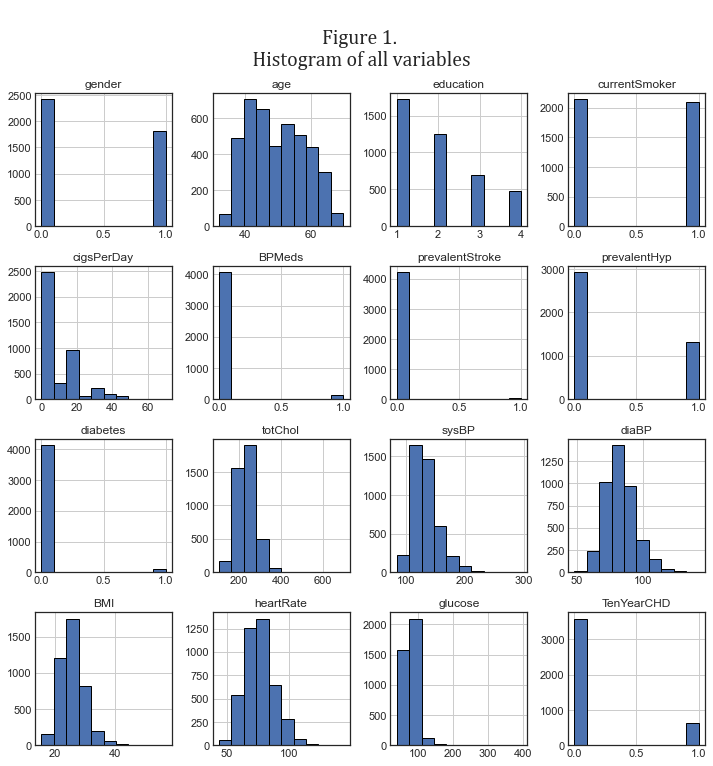

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
df.hist(edgecolor='black')
plt.suptitle("\nFigure 1.\n Histogram of all variables", fontname="Cambria", fontsize=20)
plt.show()

#### 2.3.2. Box plots of independent variables


The boxplot grpah of all the variables show the variables outliers, totchol variable has a notable outlier. Almost all the variables has outliers.

Text(0.5, 1.0, 'Figure 2. Box plots - Independent Variables')

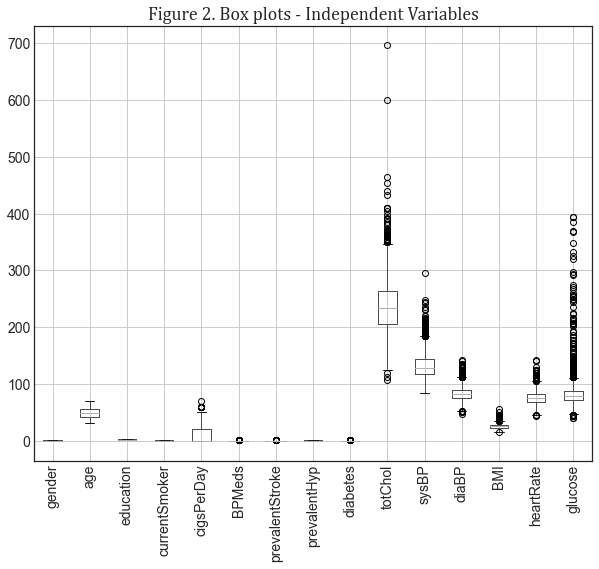

In [10]:
pred_df = df.loc[:, 'gender' : 'glucose']
plt.figure(figsize=(10, 8))  
pred_df.boxplot(fontsize=14)
plt.xticks(rotation = 90)
plt.title("Figure 2. Box plots - Independent Variables", fontname="Cambria", fontsize=18)

#### 2.3.3. Dependent Variable Distribution

Figure 3 shows distribution of the dependent variable showing the number of people who had CVD in a ten year time period. It shows that a much larger number of people did not have CVD compared to those that did. It suggests class imbalance which will be taken into account during further analysis and model development.  

[Text(0, 0, 'Non CVD'), Text(1, 0, 'CVD')]

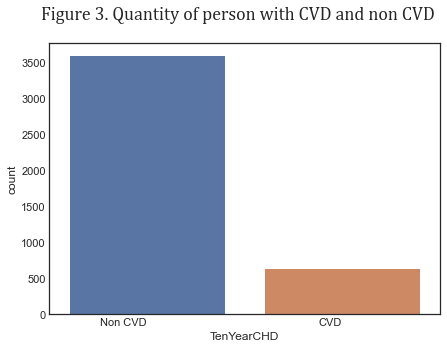

In [11]:
fig = plt.figure(figsize = (7,5))
fig.suptitle("Figure 3. Quantity of person with CVD and non CVD", fontname="Cambria", fontsize=18)

ax=sns.countplot(x = df.TenYearCHD, data= df)
ax.set_xticklabels(['Non CVD', 'CVD'], ha="right")

#### 2.3.4. Class Distribution by Gender

The graph of people that is going to suffer CVD and not (TenYearCHD) by sex shows more women that are not going to suffer CVD. The males has a slightly greater amount of CVD suffering than women.


Text(0.5, 1.0, 'Figure 4. Quantity of person with CVD and non CVD by sex')

<Figure size 720x504 with 0 Axes>

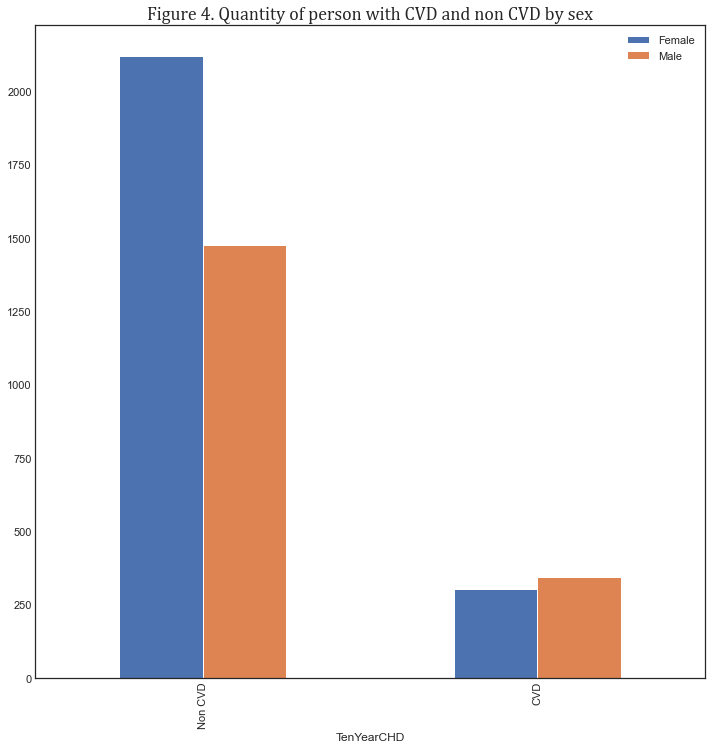

In [12]:
fig = plt.figure(figsize = (10,7))
ax1 = df.groupby(['TenYearCHD'])['gender'].value_counts().unstack().plot(kind='bar')
ax1.set_xticklabels(['Non CVD', 'CVD'])
ax1.legend(['Female', 'Male'])
plt.title("Figure 4. Quantity of person with CVD and non CVD by sex", fontname="Cambria", fontsize=18)

#### 2.3.4. Class distribution with respect to some of the other variables


The graph of people that is going to suffer CVD by topics(smoke, cholesterol, Blood presure medication, prevalent stroke and hypertention) shows a high quantity of current smokers with the Non CVD value also the patients with hypertention shows a high value of Non CVD values. this can be explained for the imbalanced class.

Text(0.5, 1.0, 'Figure 5. Quantity of person with CVD and non CVD by main topic')

<Figure size 144x144 with 0 Axes>

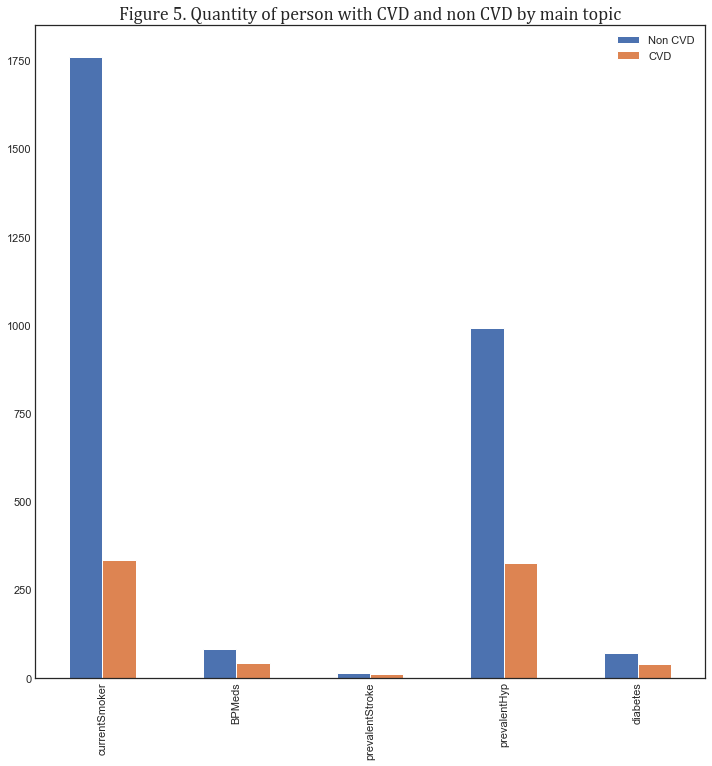

In [13]:
fig = plt.figure(figsize = (2, 2))


dg=df[['TenYearCHD','currentSmoker', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes' ]]
df_g=dg.groupby('TenYearCHD').sum()
df_g=df_g.reset_index().T
df_g=df_g.drop('TenYearCHD')
ax2=df_g.plot(kind='bar')
ax2.legend(['Non CVD', 'CVD'])
plt.title("Figure 5. Quantity of person with CVD and non CVD by main topic", fontname="Cambria", fontsize=18)


### 3. Data Cleaning & Pre-processing

#### 3.1. Treating Missing Values

There are missing values in the data and the highest percentage of missing values in a column is 9%, while the percentage of all missing values is 15.21% in the whole data set. To avoid the loss of useful information, the records with missing values were not removed and the missing values were filled with the mean of each feature. This method was used because the data for some of the categorical variables is skewed and filling the values with mean was the simplest and safest option.   

In [14]:
# checking for null values
df.isnull().any().any()

True

In [15]:
# total null values
df.isnull().sum().sum()

645

In [16]:
# null values as percentage of total values in the data set
df.isnull().sum().sum()/(len(df))*100

15.219443133553561

In [17]:
# Check which columns have missing values
df.loc[:, df.isnull().any()].columns

Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [18]:
# Calculate total number of missing values in each column 
# columns with missing values sorted in descending order of total missing values

find_missing = df.isnull().sum().sort_values(ascending=False)
find_missing.head(8)

glucose       388
education     105
BPMeds         53
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
gender          0
dtype: int64

In [19]:
# Calculate percentage of missing values in each column, 
# columns sorted in descending order of % missing values

missing_percent = find_missing/(len(df))*100
missing_percent.head(8)

glucose       9.155262
education     2.477584
BPMeds        1.250590
totChol       1.179802
cigsPerDay    0.684285
BMI           0.448325
heartRate     0.023596
gender        0.000000
dtype: float64

In [20]:
# Fill in the missing values using median of each variable
df_all = df.fillna(df.median())
# Check if all missing values have been filled
df_all.isnull().any().any()

False

In [21]:
# make separate dataframes for continuous and categorical variables

df_cont = df_all.drop(['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
                       'prevalentHyp', 'diabetes', 'education', 'TenYearCHD'], axis=1)
print(df_cont.shape, '\n\n', df_cont.head().transpose())

(4238, 8) 

                  0       1       2       3      4
age          39.00   46.00   48.00   61.00   46.0
cigsPerDay    0.00    0.00   20.00   30.00   23.0
totChol     195.00  250.00  245.00  225.00  285.0
sysBP       106.00  121.00  127.50  150.00  130.0
diaBP        70.00   81.00   80.00   95.00   84.0
BMI          26.97   28.73   25.34   28.58   23.1
heartRate    80.00   95.00   75.00   65.00   85.0
glucose      77.00   76.00   70.00  103.00   85.0


In [22]:
# make separate dataframe of all the binary categorical variables

df_categ = df_all.drop(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 
                        'heartRate', 'glucose', 'TenYearCHD'], axis =1)
print(df_categ.shape, '\n\n', df_categ.head().transpose())

(4238, 7) 

                    0    1    2    3    4
gender           1.0  0.0  1.0  0.0  0.0
education        4.0  2.0  1.0  3.0  3.0
currentSmoker    0.0  0.0  1.0  1.0  1.0
BPMeds           0.0  0.0  0.0  0.0  0.0
prevalentStroke  0.0  0.0  0.0  0.0  0.0
prevalentHyp     0.0  0.0  0.0  1.0  0.0
diabetes         0.0  0.0  0.0  0.0  0.0


#### 3.1. Ordinal Encoding for multi-category variable 'education'

Ordinal encoding was used to transform the feaute 'education' from a multi-category to a binary categorical variable.<br>
A new column 'edu' was added to the dataframe and the values were mapped to the education column as follows:<br>
Categories 1 and 2 were replaced with 1.<br>
Categories 3 and 4 were replaced with 0.

In [23]:
# make a dictionary with all category values as keys, 
#and the value each key should be replaced with.

edu_dict = {1 : 1, 
         2 : 1,
         3 : 0,
         4 : 0}


df_categ['edu'] = df_categ.education.map(edu_dict)
# df_categ.head().transpose()

# make a new dataframe in which with all categorical variables are binary

all_cats = df_categ.drop(['education'], axis=1)
all_cats.head()

,gender,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,edu
0,1,0,0.0,0,0,0,0
1,0,0,0.0,0,0,0,1
2,1,1,0.0,0,0,0,1
3,0,1,0.0,0,1,0,0
4,0,1,0.0,0,0,0,0


#### 3.2. Standardization of continuous variables

Continuous variables were standardized using the MinMaxScaler, to transform them so that all their values lie in the range of 0 to 1. This was done to make sure that all variables including the categorical ones have values on a similar scale so that the results are not biased towards variables with larger values showing larger variations. 

In [24]:
# scale all continuous independent variables
scaler = MinMaxScaler()
df_s =scaler.fit_transform(df_cont)

df_cont1 = pd.DataFrame(df_s)
df_cont1.head(4)

,0,1,2,3,4,5,6,7
0,0.184211,0.000000,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.368421,0.000000,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,0.421053,0.285714,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.763158,0.428571,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966


In [25]:
# this step is not particularly important
# done just in case we need to refer to variable names at some point

var_names = df_cont.columns.tolist()
col_numbers = df_cont1.columns.tolist()

# Replacing the column numbers in scaled data with the original variable names

df_cont1.rename(columns=dict(zip(col_numbers, var_names)), inplace=True)
df_cont1.head() 
# Columns have the correct names instead of numbers now.

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.184211,0.000000,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.368421,0.000000,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,0.421053,0.285714,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.763158,0.428571,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.368421,0.328571,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119


In [26]:
# combining all continuous and categorical independent variables into one dataframe
df_indep = pd.concat([df_cont1, all_cats], axis = 1)
df_indep.head(8).transpose()

,0,1,2,3,4,5,6,7
age,0.184211,0.368421,0.421053,0.763158,0.368421,0.289474,0.815789,0.342105
cigsPerDay,0.000000,0.000000,0.285714,0.428571,0.328571,0.000000,0.000000,0.285714
totChol,0.149406,0.242784,0.234295,0.200340,0.302207,0.205433,0.166384,0.349745
sysBP,0.106383,0.177305,0.208038,0.314421,0.219858,0.456265,0.257683,0.078014
diaBP,0.232804,0.349206,0.338624,0.497354,0.380952,0.656085,0.243386,0.243386
BMI,0.277024,0.319680,0.237518,0.316045,0.183228,0.357731,0.425836,0.148812
heartRate,0.363636,0.515152,0.313131,0.212121,0.414141,0.333333,0.161616,0.353535
glucose,0.104520,0.101695,0.084746,0.177966,0.127119,0.166667,0.127119,0.107345
gender,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
currentSmoker,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000


In [27]:
# ensuring all independent variables have values from 0 to 1.

df_indep.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4238.0,0.462762,0.225583,0.0,0.263158,0.447368,0.631579,1.0
cigsPerDay,4238.0,0.127735,0.170034,0.0,0.000000,0.000000,0.285714,1.0
totChol,4238.0,0.220186,0.075259,0.0,0.168081,0.215620,0.263158,1.0
sysBP,4238.0,0.230981,0.104199,0.0,0.158392,0.210402,0.286052,1.0
diaBP,4238.0,0.369243,0.126041,0.0,0.285714,0.359788,0.443122,1.0
BMI,4238.0,0.248672,0.098668,0.0,0.182744,0.238972,0.302896,1.0
heartRate,4238.0,0.322007,0.121467,0.0,0.242424,0.313131,0.393939,1.0
glucose,4238.0,0.117524,0.064591,0.0,0.090395,0.107345,0.127119,1.0
gender,4238.0,0.429212,0.495022,0.0,0.000000,0.000000,1.000000,1.0
currentSmoker,4238.0,0.494101,0.500024,0.0,0.000000,0.000000,1.000000,1.0


#### 3.3. Heatmap: to check correlation between variables 

A correlation heatmap was created including all independent variables in the dataset, to see if there is high correlation between any variables. 
Two variables 'diaBP' and 'currentSmoker' were removed because they were highly correlated (correlation co-efficient > 0.75) with two other variables.

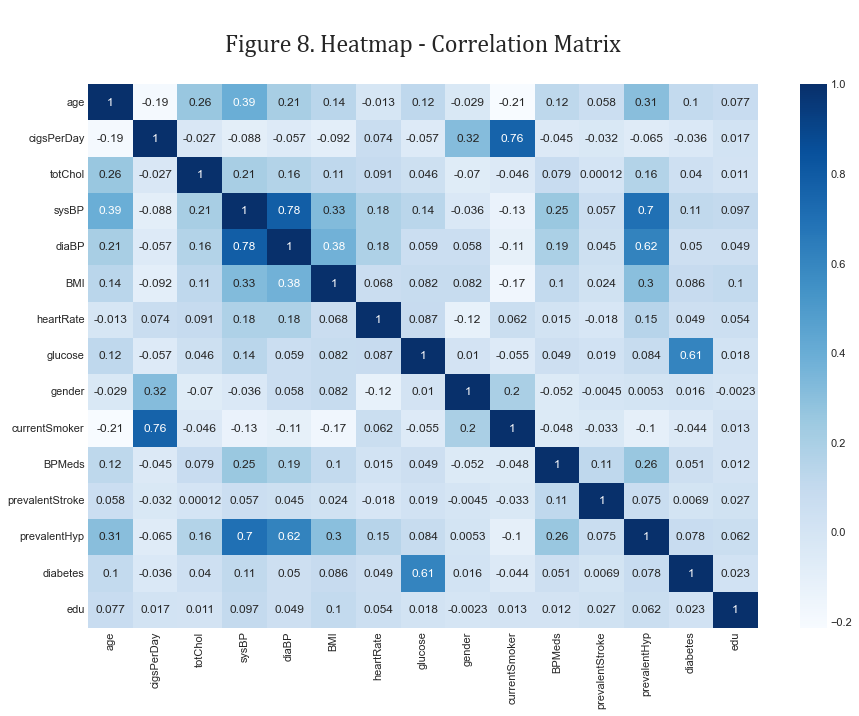

In [28]:
corr_matrix = df_indep.corr()
features = corr_matrix.index
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
plt.title("\nFigure 8. Heatmap - Correlation Matrix\n", fontname="Cambria", fontsize=24)
corr_heatmap = sns.heatmap(df_indep[features].corr(),annot=True,cmap="Blues")

In [29]:
# Find highly correlated features (correlation co-efficient > 0.75)

corr_feats = set()
cor_mat = df_indep.corr()

for i in range(len(cor_mat.columns)):
    for j in range(i):
        if abs(cor_mat.iloc[i, j]) > 0.75:
            corr_col = cor_mat.columns[i]
            corr_feats.add(corr_col)

print(len(corr_feats),'\n', corr_feats)

2 
 {'currentSmoker', 'diaBP'}


In [30]:
# make new dataframe of independent variables with 'diaBP' and 'currentSmoker' removed

X = df_indep.drop(['diaBP', 'currentSmoker'], axis=1)
X.head(5)

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,gender,BPMeds,prevalentStroke,prevalentHyp,diabetes,edu
0,0.184211,0.000000,0.149406,0.106383,0.277024,0.363636,0.104520,1,0.0,0,0,0,0
1,0.368421,0.000000,0.242784,0.177305,0.319680,0.515152,0.101695,0,0.0,0,0,0,1
2,0.421053,0.285714,0.234295,0.208038,0.237518,0.313131,0.084746,1,0.0,0,0,0,1
3,0.763158,0.428571,0.200340,0.314421,0.316045,0.212121,0.177966,0,0.0,0,1,0,0
4,0.368421,0.328571,0.302207,0.219858,0.183228,0.414141,0.127119,0,0.0,0,0,0,0


#### 3.4. Checking for Class Imbalance

Class frequencies (CF) and relative class frequencies (RCF%) were calculated to check the percentage of each class in the target column, i.e., TenYearCHD. Findings indicated that the data set is imbalanced and it should be taken into accoutn in the next steps.

Two common ways to handle data imbalance are:
1. Using SMOTE (synthetic minority oversampling technique)
2. Using weighted classification models

For this project SMOTE was used on data sets after dividing the data into three sets, train, validation, and test.

In [31]:
# separate the class column from the independent variables

df_class = df_all.iloc[:, -1]
df_class

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [32]:
# calculate the number and percentage of each class to check for class imbalance
cl_frequency = df_class.value_counts()
rel_frequency = df_class.value_counts(normalize=True) * 100
print('\nClass frequency (CF):\n',cl_frequency, '\n\nRelative class frequency (RCF%):\n', rel_frequency)


Class frequency (CF):
 0    3594
1     644
Name: TenYearCHD, dtype: int64 

Relative class frequency (RCF%):
 0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64


#### 3.5. Splitting the data set before developing classificaiton models

Since the data set is imbalanced, it was split using stratified train-test split, to ensure that class frequencies are preserved in the train and test data sets. Class frequencies and relative frequencies were calculated again to confirm that the imbalance was maintained. 

The data was split twice. The first split divided the data into training and remaining data sets with 70% included in the training set. In the second split, the remaining data was eqaually divided into validation and test sets. 

In [33]:
y = df_all.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [34]:
# SPLIT 1: 
# Split 70% of data for training the model
# remaing 30% data will be divided into two equal parts for validation and test samples
X_train,X_rest,y_train,y_rest = train_test_split(X, y, train_size=0.70, random_state=1, stratify = y)
print(X_train.shape, X_rest.shape, y_train.shape, y_rest.shape)

(2966, 13) (1272, 13) (2966,) (1272,)


In [35]:
# checking to ensure CF and RCF% were preserved after data splitting
#ytr_count = y_train.value_counts()
#yt_count = y_test.value_counts()

train_freq = y_train.value_counts(normalize=True) * 100
rest_freq = y_rest.value_counts(normalize=True) * 100

# 'CF - test dataset:\n', yt_count, '\n\nCF - train dataset:\n', ytr_count,
print('RCF% - training dataset:\n', train_freq,  '\n\nRCF% - remaining dataset:\n', rest_freq)

RCF% - training dataset:
 0    84.794336
1    15.205664
Name: TenYearCHD, dtype: float64 

RCF% - remaining dataset:
 0    84.827044
1    15.172956
Name: TenYearCHD, dtype: float64


In [36]:
# SPLIT 2
# Split the data into equal parts (50%) for validation and testing
# validation and test data sets are 15% of the original data set

X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, train_size=0.50, random_state=1, stratify = y_rest)
print(X_valid.shape, X_test.shape, y_valid.shape, y_test.shape)

(636, 13) (636, 13) (636,) (636,)


In [37]:
# checking to ensure CF and RCF% were preserved after data splitting
#ytr_count = y_train.value_counts()
#yt_count = y_test.value_counts()

valid_freq = y_valid.value_counts(normalize=True) * 100
test_freq = y_test.value_counts(normalize=True) * 100

# 'CF - test dataset:\n', yt_count, '\n\nCF - train dataset:\n', ytr_count,
print('RCF% - validation dataset:\n', valid_freq,  '\n\nRCF% - test dataset:\n', test_freq)

RCF% - validation dataset:
 0    84.90566
1    15.09434
Name: TenYearCHD, dtype: float64 

RCF% - test dataset:
 0    84.748428
1    15.251572
Name: TenYearCHD, dtype: float64


#### 3.6. SMOTE on training data set:

SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE was perforemd separately on each sample after splitting the data, to avoid data leakage and improve generalizability.

In [38]:
# applying SMOTE to the training data for both dependent and independent variables
#X = pd.DataFrame(x_pc4)
oversample = SMOTE()
X_train, y_train =oversample.fit_resample(X_train, y_train)
X_train['Class'] = y_train

print(X_train.shape) 
print(y_train.shape)
print(X_train.head().transpose())

(5030, 14)
(5030,)
                        0         1         2         3         4
age              0.710526  0.263158  0.605263  0.342105  0.526316
cigsPerDay       0.000000  0.000000  0.000000  0.000000  0.285714
totChol          0.297114  0.181664  0.285229  0.232598  0.157895
sysBP            0.304965  0.172577  0.148936  0.137116  0.271868
BMI              0.246001  0.313379  0.314590  0.252787  0.267087
heartRate        0.464646  0.343434  0.292929  0.313131  0.262626
glucose          0.107345  0.104520  0.110169  0.107345  0.127119
gender           0.000000  1.000000  1.000000  0.000000  1.000000
BPMeds           0.000000  0.000000  0.000000  0.000000  0.000000
prevalentStroke  0.000000  0.000000  0.000000  0.000000  0.000000
prevalentHyp     1.000000  0.000000  0.000000  0.000000  1.000000
diabetes         0.000000  0.000000  0.000000  0.000000  0.000000
edu              0.000000  1.000000  0.000000  1.000000  1.000000
Class            0.000000  0.000000  1.000000  0.000000  

In [39]:
# create separate data frame with independent variables after SMOTE

X_train1 = X_train.iloc[:, 0:13]
print(X_train1.head().transpose())
print(X_train1.shape)

                        0         1         2         3         4
age              0.710526  0.263158  0.605263  0.342105  0.526316
cigsPerDay       0.000000  0.000000  0.000000  0.000000  0.285714
totChol          0.297114  0.181664  0.285229  0.232598  0.157895
sysBP            0.304965  0.172577  0.148936  0.137116  0.271868
BMI              0.246001  0.313379  0.314590  0.252787  0.267087
heartRate        0.464646  0.343434  0.292929  0.313131  0.262626
glucose          0.107345  0.104520  0.110169  0.107345  0.127119
gender           0.000000  1.000000  1.000000  0.000000  1.000000
BPMeds           0.000000  0.000000  0.000000  0.000000  0.000000
prevalentStroke  0.000000  0.000000  0.000000  0.000000  0.000000
prevalentHyp     1.000000  0.000000  0.000000  0.000000  1.000000
diabetes         0.000000  0.000000  0.000000  0.000000  0.000000
edu              0.000000  1.000000  0.000000  1.000000  1.000000
(5030, 13)


In [40]:
# Count total numbe of positive and negative classes.
y_train.value_counts()

0    2515
1    2515
Name: TenYearCHD, dtype: int64

In [41]:
# Calculate percentage of positive and negative classes.
y_train.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: TenYearCHD, dtype: float64

#### 3.7.  SMOTE on validation data:

In [42]:
# applying SMOTE to the training data for both dependent and independent variables
#X = pd.DataFrame(x_pc4)
oversample = SMOTE()
X_valid, y_valid =oversample.fit_resample(X_valid, y_valid)
X_valid['Class'] = y_valid

print(X_valid.shape) 
print(y_valid.shape)
print(X_valid.head().transpose())

(1080, 14)
(1080,)
                        0         1         2         3         4
age              0.552632  0.500000  0.421053  0.236842  0.473684
cigsPerDay       0.000000  0.000000  0.000000  0.000000  0.571429
totChol          0.312394  0.254669  0.337861  0.251273  0.222411
sysBP            0.252955  0.210402  0.267139  0.174941  0.208038
BMI              0.567135  0.227824  0.203829  0.371062  0.297625
heartRate        0.313131  0.242424  0.212121  0.565657  0.363636
glucose          0.093220  0.135593  0.084746  0.110169  0.081921
gender           0.000000  0.000000  1.000000  1.000000  1.000000
BPMeds           1.000000  0.000000  0.000000  0.000000  0.000000
prevalentStroke  1.000000  0.000000  0.000000  0.000000  0.000000
prevalentHyp     1.000000  0.000000  1.000000  0.000000  0.000000
diabetes         0.000000  0.000000  0.000000  0.000000  0.000000
edu              1.000000  0.000000  1.000000  1.000000  1.000000
Class            0.000000  0.000000  0.000000  0.000000  

In [43]:
# create separate dataframe with independent variables from the test dataset after SMOTE

X_valid1 = X_valid.iloc[:, 0:13]
print(X_valid1.head().transpose())
print(X_valid1.shape)

                        0         1         2         3         4
age              0.552632  0.500000  0.421053  0.236842  0.473684
cigsPerDay       0.000000  0.000000  0.000000  0.000000  0.571429
totChol          0.312394  0.254669  0.337861  0.251273  0.222411
sysBP            0.252955  0.210402  0.267139  0.174941  0.208038
BMI              0.567135  0.227824  0.203829  0.371062  0.297625
heartRate        0.313131  0.242424  0.212121  0.565657  0.363636
glucose          0.093220  0.135593  0.084746  0.110169  0.081921
gender           0.000000  0.000000  1.000000  1.000000  1.000000
BPMeds           1.000000  0.000000  0.000000  0.000000  0.000000
prevalentStroke  1.000000  0.000000  0.000000  0.000000  0.000000
prevalentHyp     1.000000  0.000000  1.000000  0.000000  0.000000
diabetes         0.000000  0.000000  0.000000  0.000000  0.000000
edu              1.000000  0.000000  1.000000  1.000000  1.000000
(1080, 13)


In [44]:
# Count total numbe of positive and negative classes.
#y_valid.value_counts()
# Calculate percentage of positive and negative classes.
y_valid.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: TenYearCHD, dtype: float64

##### Names of dataframes for further analysis

independent variables train:   X_train1     <br>

independent variables valid:   X_valid1      <br>

dependent variables train:     y_train      <br>

dependent variables valid:     y_valid       <br>

## 4. Developing & Evaluating Classification Models


### 4.1.  Logistic regression 

First a baseline logistic regression model was developed, then a grid search was done with repeated stratified k folds, to find out the best parameters of the model, using F1-score. 

### 4.1.1.  Logistic regression - Baseline

In [45]:
# fitting model with default parameters as baseline

lr_base = LogisticRegression(random_state=0)

lr_base.fit(X_train1, y_train)
lr_base_pred = lr_base.predict(X_valid1)

In [46]:
baseline_score = roc_auc_score(y_valid, lr_base_pred)
baseline_cr = classification_report(y_valid, lr_base_pred)

print('Baseline - Logistic Regression',
      '\nROC AUC: {0:0.3f}'.format(baseline_score), 
      f'\nClassification Report:\n{baseline_cr}') 

Baseline - Logistic Regression 
ROC AUC: 0.658 
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       540
           1       0.64      0.71      0.67       540

    accuracy                           0.66      1080
   macro avg       0.66      0.66      0.66      1080
weighted avg       0.66      0.66      0.66      1080



### 4.1.2.  Logistic regression - Parameter Tuning

In [47]:
# For parameter tuning we used Grid Search CV with Repeated Stratified KFold

# making dictionaries of different parameters for logistic regression
c_params = [0.0001, 0.001, 0.1, 1, 10, 100]
pen_params = ["l1", "l2"]
solv_params = ["liblinear", "lbfgs"]

# create grid for GridSearchCV
lr_grid = dict(solver=solv_params ,penalty=pen_params, C=c_params)

# specify cross validation parameters with RepeatedStratifiedKFold for GridSearchCV
lr_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_grid = GridSearchCV(estimator=lr_base, param_grid=lr_grid, n_jobs=-1, cv=lr_cv, scoring='f1',error_score=0)

# fit grid search model on the data
lr_grid.fit(X_train1, y_train)   

# print best parameters 
print(f'Best F1-score: {lr_grid.best_score_} \nBest param: {lr_grid.best_params_}')  

Best F1-score: 0.6802110084431096 
Best param: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [48]:
best_lr = LogisticRegression(C=0.0001, penalty='l2', solver='liblinear')

best_lr.fit(X_train1, y_train)
lr_pred2 = best_lr.predict(X_valid1)

In [49]:
bestlr_score = roc_auc_score(y_valid, lr_pred2)
bestlr_cr = classification_report(y_valid, lr_pred2)

print('Logistic Regression with best parameters from ',
      '\nROC AUC: {0:0.3f}'.format(bestlr_score), 
      f'\n\nClassification Report:\n{bestlr_cr}') 

Logistic Regression with best parameters from  
ROC AUC: 0.506 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       540
           1       0.50      1.00      0.67       540

    accuracy                           0.51      1080
   macro avg       0.75      0.51      0.35      1080
weighted avg       0.75      0.51      0.35      1080



### 4.2.  Random Forest Classifier

#### 4.2.1. Random Forest Classifier - Baseline

In [50]:
# fitting model with default parameters as baseline

rf_base = RandomForestClassifier(random_state = 0)

rf_base.fit(X_train1, y_train)
rf_base_pred = rf_base.predict(X_valid1)

In [51]:
rfbase_score = roc_auc_score(y_valid, rf_base_pred)
rfbase_cr = classification_report(y_valid, rf_base_pred)

print('Random Forest Classifier - Baseline',
      '\nROC AUC: {0:0.3f}'.format(rfbase_score), 
      f'\nClassification Report:\n{rfbase_cr}') 

Random Forest Classifier - Baseline 
ROC AUC: 0.643 
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       540
           1       0.75      0.43      0.55       540

    accuracy                           0.64      1080
   macro avg       0.67      0.64      0.63      1080
weighted avg       0.67      0.64      0.63      1080



#### 3.2.2. Random Forest Classifier - Paremeter Tuning

In [52]:
n_estimators = [10, 100, 1000]
#max_features = ['sqrt', 'log2'] max_features=max_features,
max_depth = [20, 40, 60]
# define grid search
grid = dict(n_estimators=n_estimators, max_depth=max_depth)
rf_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rf_grid_model = GridSearchCV(estimator=rf_base, param_grid=grid, n_jobs=-1, cv=rf_cv, scoring='f1',error_score=0)
grid_result = rf_grid_model.fit(X_train1, y_train)
rf_grid_pred = rf_base.predict(X_valid1)

print(f'Best F1-score: {rf_grid_model.best_score_} \nBest param: {rf_grid_model.best_params_}')  

Best F1-score: 0.886031661185005 
Best param: {'max_depth': 40, 'n_estimators': 1000}


In [53]:
best_rf = RandomForestClassifier(random_state = 0, n_estimators=1000, max_depth=40)

best_rf.fit(X_train1, y_train)
rf_pred2 = best_rf.predict(X_valid1)

In [54]:
bestrf_score = roc_auc_score(y_valid, rf_pred2)
bestrf_cr = classification_report(y_valid, rf_pred2)

print('Random Forest with Best Parameters',      
      '\nROC AUC: {0:0.3f}'.format(rfbase_score), 
      f'\nClassification Report:\n{bestrf_cr}') 

Random Forest with Best Parameters 
ROC AUC: 0.643 
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       540
           1       0.75      0.42      0.54       540

    accuracy                           0.64      1080
   macro avg       0.67      0.64      0.62      1080
weighted avg       0.67      0.64      0.62      1080



### 4.3.  Gradient Boost Classifier

#### 4.3.1. Gradient Boost Classifier - Baseline

In [55]:
# fitting model with default parameters as baseline
gb_base = GradientBoostingClassifier(random_state = 0)

gb_base.fit(X_train1, y_train)
gb_base_pred = gb_base.predict(X_valid1)

In [56]:
gb_base_score = roc_auc_score(y_valid, gb_base_pred)
gb_base_cr = classification_report(y_valid, gb_base_pred)

print('Gradient Boosting Classifier - Baseline',
      '\nROC AUC: {0:0.3f}'.format(gb_base_score), 
      f'\nClassification Report:\n{gb_base_cr}') 

Gradient Boosting Classifier - Baseline 
ROC AUC: 0.794 
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       540
           1       0.78      0.82      0.80       540

    accuracy                           0.79      1080
   macro avg       0.79      0.79      0.79      1080
weighted avg       0.79      0.79      0.79      1080



#### 4.3.2. Gradient Boost Classifier - Parameter Tuning

The code for parameter tuning of the GB classifier was too computationally intensive and it never finished on our computers. But it is added in the notebook to show the process. These parameters were tried separately to fit different models and the one that showed the best results was chosen as the final model of this classifier.

In [57]:
# I could not get the previous code for GradientSearchCV to finish 
# So I fitted the model a few times with different parameters and this is the best one I found

gb_best = GradientBoostingClassifier(random_state = 0, learning_rate= 0.1, 
                                     max_depth= 3, n_estimators= 1000, subsample= 0.5)

gb_best.fit(X_train1, y_train)
gb_pred2 = gb_best.predict(X_valid1)

In [58]:
bestgb_score = roc_auc_score(y_valid, gb_pred2)
bestgb_cr = classification_report(y_valid, gb_pred2)

print('Random Forest with Best Parameters',
      '\nROC AUC: {0:0.3f}'.format(rfbase_score), 
      f'\nClassification Report:\n{bestgb_cr}') 

Random Forest with Best Parameters 
ROC AUC: 0.643 
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       540
           1       0.91      0.82      0.86       540

    accuracy                           0.87      1080
   macro avg       0.87      0.87      0.87      1080
weighted avg       0.87      0.87      0.87      1080



## 5. Model Selection and Prediction

Looking at the F1-score of all classification models, Gradient Boosting classifier appears to be the best model, as it has the highest F1-score of 0.87 after parameter tuning and an F1-score of 0.77 without parameter tuning. 

In the next steps this model will be used to make predictions with the test data set.

### 5.1. Pre-processing the test (holdout) data set


#### 5.1.1.  SMOTE on test data:

In [59]:
# applying SMOTE to the training data for both dependent and independent variables
#X = pd.DataFrame(x_pc4)
oversample = SMOTE()
X_test, y_test =oversample.fit_resample(X_test, y_test)
X_test['Class'] = y_test

print(X_test.shape) 
print(y_test.shape)
print(X_test.head().transpose())

(1078, 14)
(1078,)
                        0         1         2         3         4
age              0.710526  0.447368  0.263158  0.368421  0.473684
cigsPerDay       0.000000  0.128571  0.128571  0.285714  0.128571
totChol          0.207131  0.146010  0.132428  0.190153  0.320883
sysBP            0.080378  0.148936  0.186761  0.163121  0.167849
BMI              0.233640  0.153175  0.214978  0.209161  0.194135
heartRate        0.000000  0.040404  0.393939  0.262626  0.313131
glucose          0.115819  0.135593  0.146893  0.141243  0.081921
gender           1.000000  1.000000  0.000000  1.000000  1.000000
BPMeds           0.000000  0.000000  0.000000  0.000000  0.000000
prevalentStroke  0.000000  0.000000  0.000000  0.000000  0.000000
prevalentHyp     0.000000  0.000000  0.000000  0.000000  0.000000
diabetes         0.000000  0.000000  0.000000  0.000000  0.000000
edu              1.000000  1.000000  1.000000  1.000000  0.000000
Class            0.000000  0.000000  0.000000  0.000000  

In [60]:
# create separate dataframe with independent variables from the test dataset after SMOTE

X_test2 = X_test.iloc[:, 0:13]
print(X_test2.head().transpose())
print(X_test2.shape)

                        0         1         2         3         4
age              0.710526  0.447368  0.263158  0.368421  0.473684
cigsPerDay       0.000000  0.128571  0.128571  0.285714  0.128571
totChol          0.207131  0.146010  0.132428  0.190153  0.320883
sysBP            0.080378  0.148936  0.186761  0.163121  0.167849
BMI              0.233640  0.153175  0.214978  0.209161  0.194135
heartRate        0.000000  0.040404  0.393939  0.262626  0.313131
glucose          0.115819  0.135593  0.146893  0.141243  0.081921
gender           1.000000  1.000000  0.000000  1.000000  1.000000
BPMeds           0.000000  0.000000  0.000000  0.000000  0.000000
prevalentStroke  0.000000  0.000000  0.000000  0.000000  0.000000
prevalentHyp     0.000000  0.000000  0.000000  0.000000  0.000000
diabetes         0.000000  0.000000  0.000000  0.000000  0.000000
edu              1.000000  1.000000  1.000000  1.000000  0.000000
(1078, 13)


In [61]:
# Count total numbe of positive and negative classes.
y_test.value_counts()

0    539
1    539
Name: TenYearCHD, dtype: int64

In [62]:
# Calculate percentage of positive and negative classes.
y_test.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: TenYearCHD, dtype: float64

### 5.2. Predictions with the holdout data set

In [63]:
# fit the selected model on the test data to make class predictions
test_pred = gb_best.predict(X_test2)

test_pred1 = test_pred.T

df_pred1 = pd.DataFrame(test_pred1)
df_pred1.columns=['TenYearCHD']
df_pred1.shape

(1078, 1)

### 5.2.1. Model performance on the test data

Using the gradient boost model predictions were made on the test data set, and the results show that the model performed well with an F1-score of 0.85, and an ROC-AUC score of 0.847. 

In [64]:
pred_score = roc_auc_score(y_test, df_pred1)
pred_cr = classification_report(y_test, df_pred1)

print('Random Forest with Best Parameters',
      '\nROC AUC: {0:0.3f}'.format(pred_score), 
      f'\nClassification Report:\n{pred_cr}') 

Random Forest with Best Parameters 
ROC AUC: 0.843 
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       539
           1       0.88      0.79      0.83       539

    accuracy                           0.84      1078
   macro avg       0.85      0.84      0.84      1078
weighted avg       0.85      0.84      0.84      1078

